In [105]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statistics as statss
from scipy import stats

In [106]:
dimonds=pd.read_csv("/Users/Yanaorfin_1/Documents/Academy/Dimonds_analysis/diamonds.csv")

In [107]:
dimonds.head(5)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [108]:
dimonds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [109]:
dimonds.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [110]:
# new column 
dimonds["price_per_carat"]=dimonds["price"]/dimonds["carat"]


In [111]:

# dimonds["carat_label"]=dimonds["carat"].apply(lambda value: "XS" if value<0.5 else "S" if value<=1 else "M" if value<=1 else ) 
# dimonds["carat_label"]=dimonds["carat"].apply(lambda value: "XL" if value>4 else "L" if value>3 else "")


dimonds["carat_label"]=dimonds["carat"].apply(lambda value: 
"XS" if value<0.5
else "S" if value<1 
else "M" if value<2
else "L" if value < 4
else "XL")

In [135]:
dimonds.loc[(dimonds["carat_label"]=="XS"),["carat","price","price_per_carat"]].head(5)

,carat,price,price_per_carat
0,0.23,326,1417.391304
1,0.21,326,1552.380952
2,0.23,327,1421.739130
3,0.29,334,1151.724138
4,0.31,335,1080.645161


In [138]:
dimonds.loc[(dimonds["carat_label"]=="M"),["carat","price","price_per_carat"]].tail(25)

,carat,price,price_per_carat
52538,1.00,2530,2530.000000
52592,1.03,2540,2466.019417
52805,1.30,2571,1977.692308
52993,1.29,2596,2012.403101
53031,1.01,2602,2576.237624
53081,1.02,2611,2559.803922
53146,1.20,2622,2185.000000
53338,1.20,2655,2212.500000
53352,1.00,2657,2657.000000
53353,1.00,2657,2657.000000


In [113]:
dimonds.describe()

,carat,depth,table,price,x,y,z,price_per_carat
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734,4008.394796
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699,2012.665747
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000,1051.162791
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000,2477.944444
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000,3495.198031
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000,4949.599702
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000,17828.846154


EDA

In [114]:
plt.style.use("dark_background")

In [115]:
color_list=dimonds.color.unique()
color_list.sort()

In [116]:
clarity_order=["I1", "SI2", "SI1", "VS2", "VS1", "VVS2", "VVS1", "IF"]
cut_order=["Fair", "Good", "Very Good", "Premium", "Ideal"]
color_order=color_list

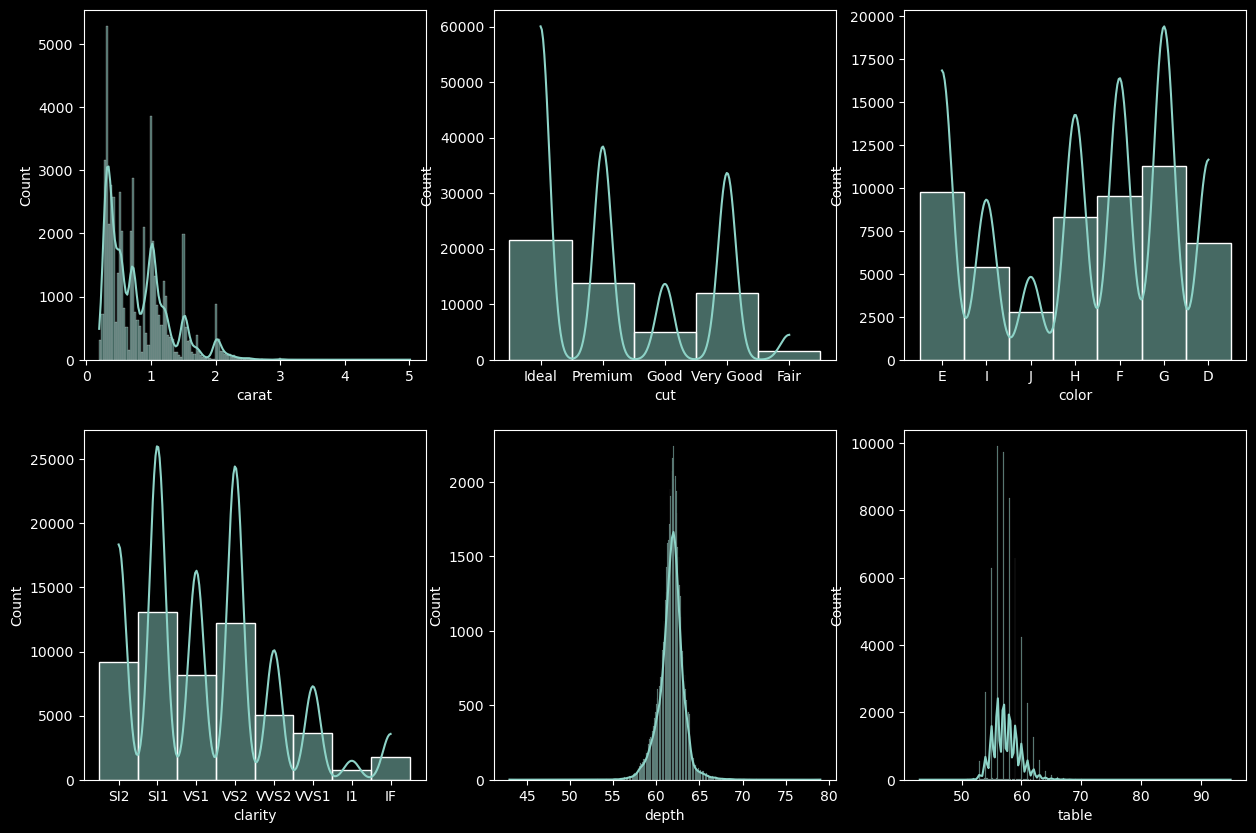

In [129]:
#Distribution of 

fig,axs=plt.subplots(2,3,figsize=(15,10))
sns.histplot(data=dimonds,x="carat",kde=True,ax=axs[0,0])
sns.histplot(data=dimonds,x="cut",kde=True,ax=axs[0,1])
sns.histplot(data=dimonds,x="color",kde=True,ax=axs[0,2])
sns.histplot(data=dimonds,x="clarity",kde=True,ax=axs[1,0])
sns.histplot(data=dimonds,x="depth",kde=True,ax=axs[1,1])
sns.histplot(data=dimonds,x="table",kde=True,ax=axs[1,2])
plt.show()

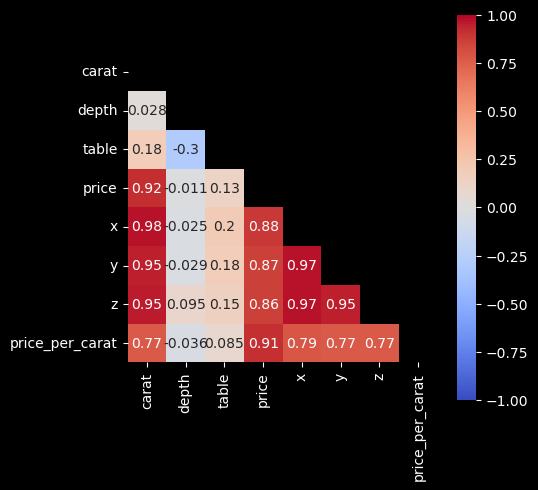

In [118]:
matrix=dimonds.corr()
fig,ax=plt.subplots(figsize=(5,5))
# Generate a mask to onlyshow the bottom triangle
mask=np.triu(np.ones_like(matrix,dtype=bool))

sns.heatmap(matrix,cmap="coolwarm",vmin=-1,vmax=1,robust=True,square=True,annot=True,mask=mask)



plt.show()

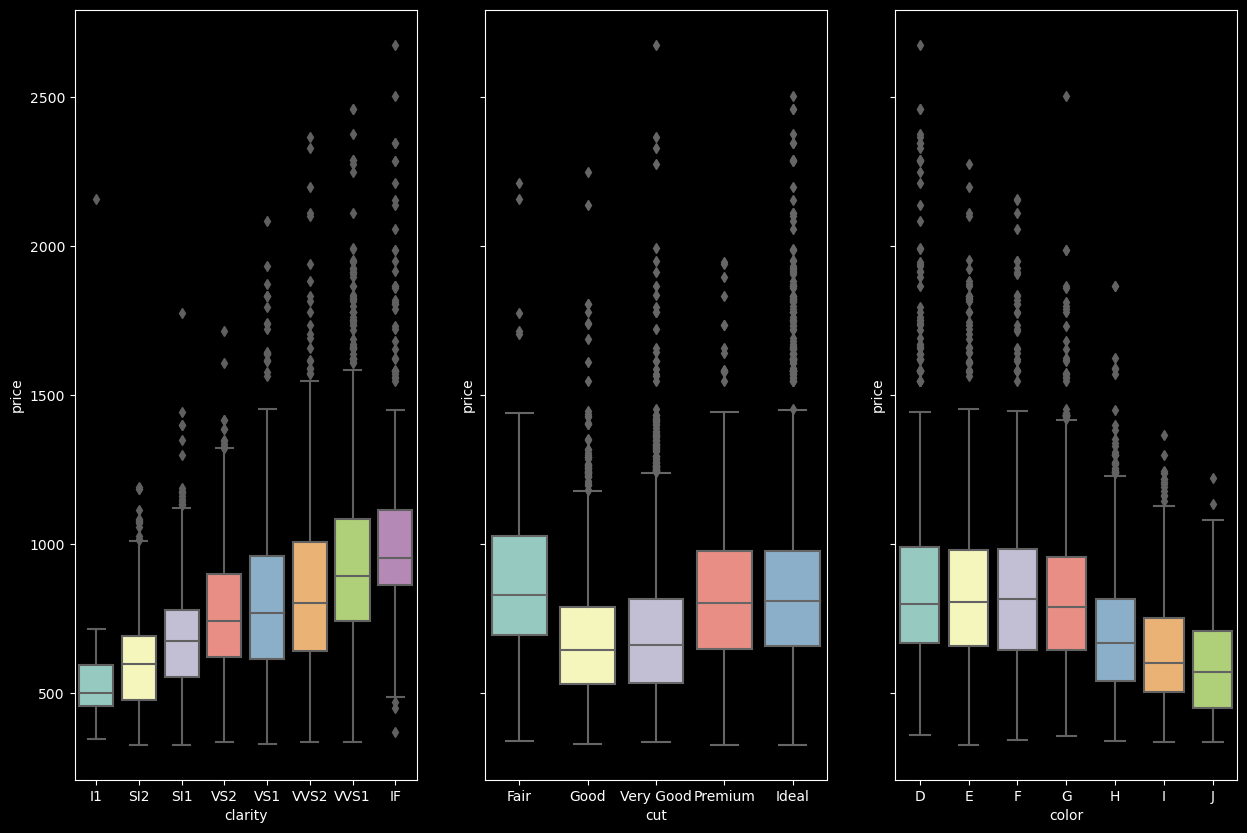

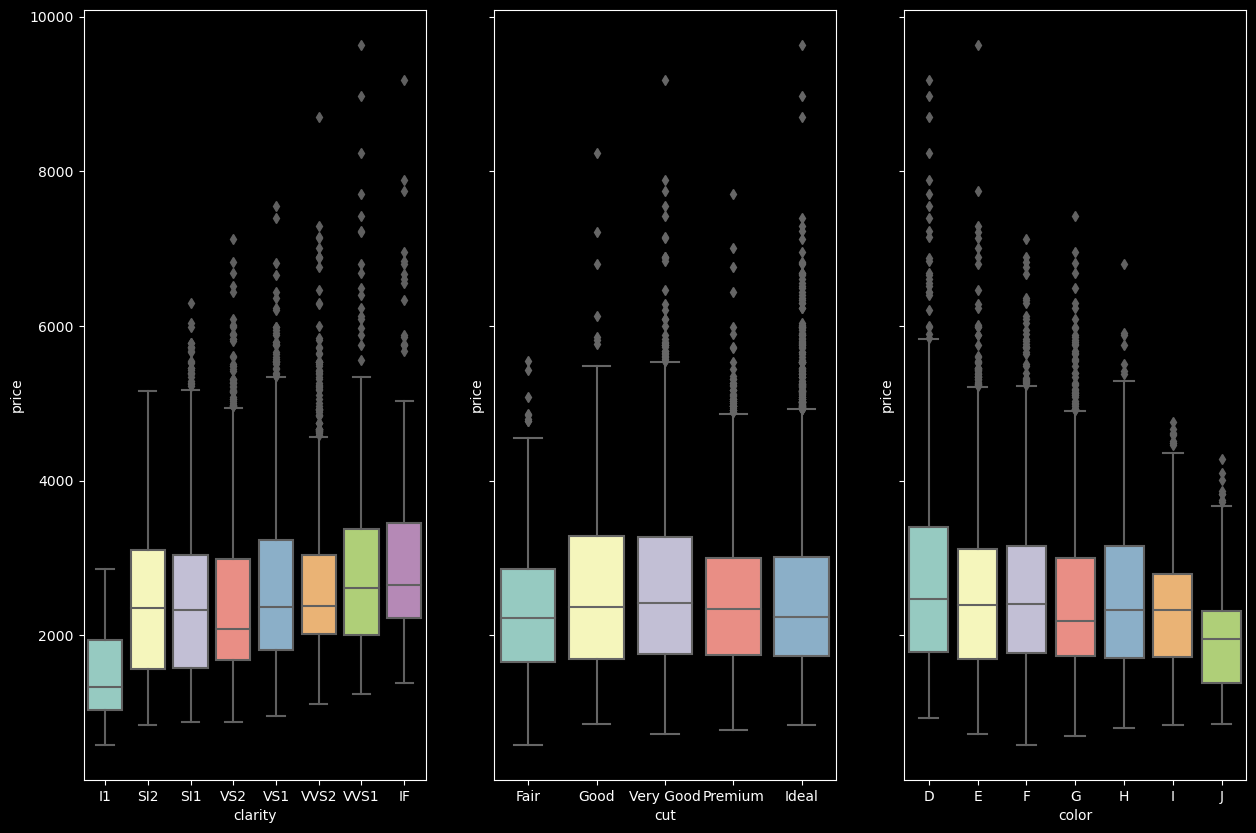

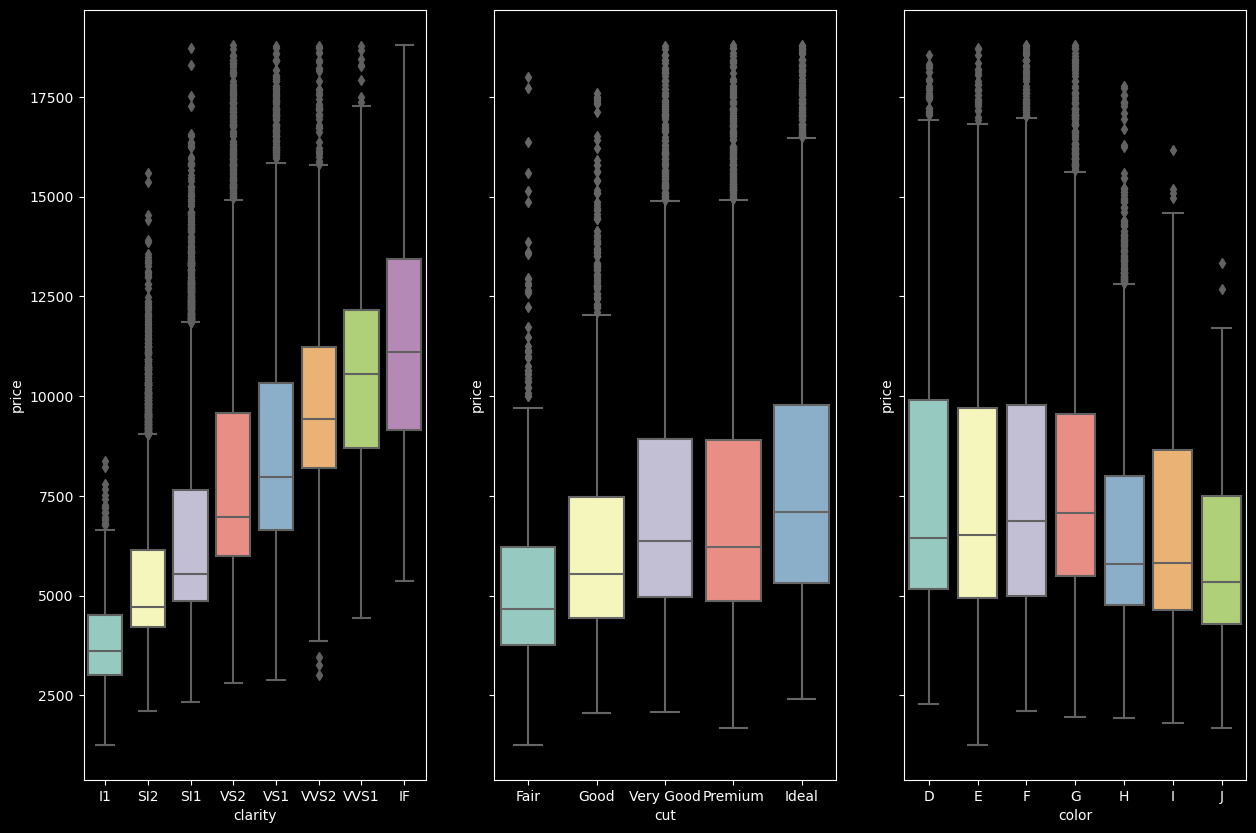

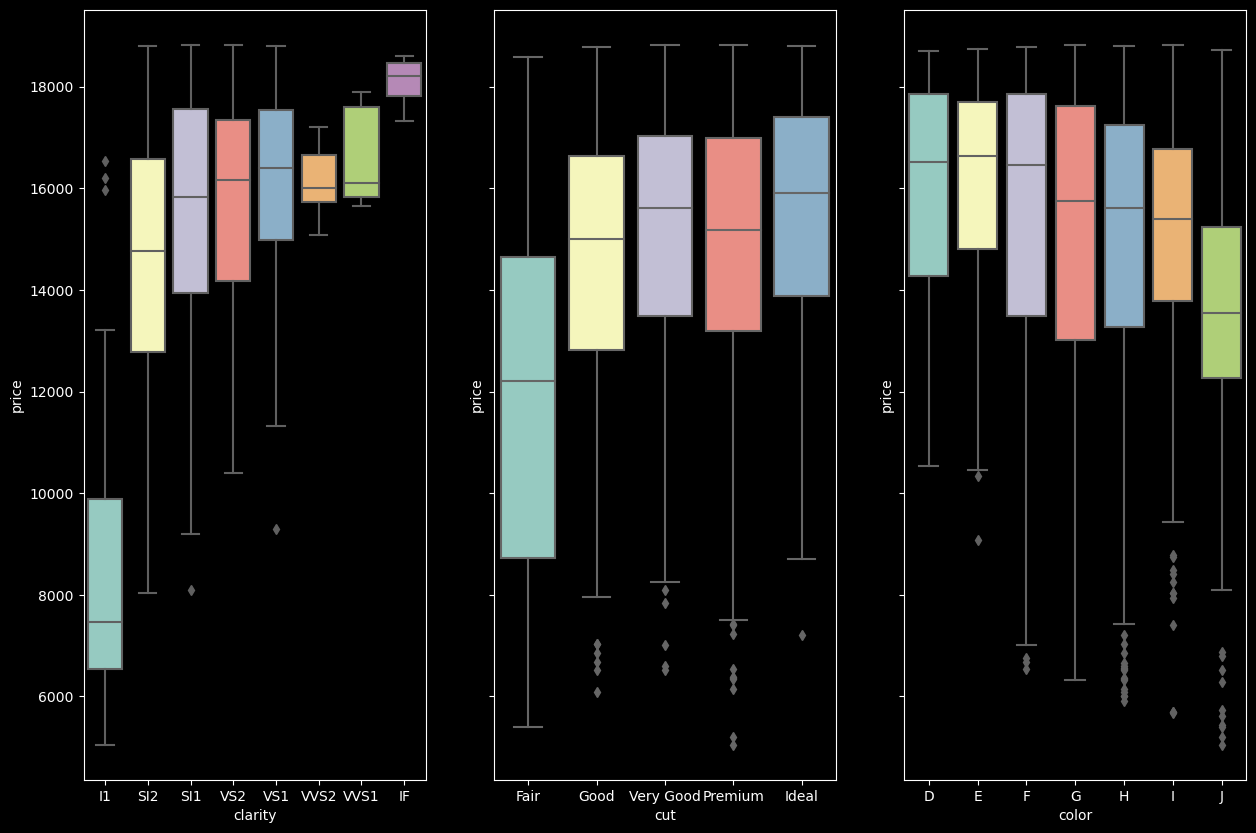

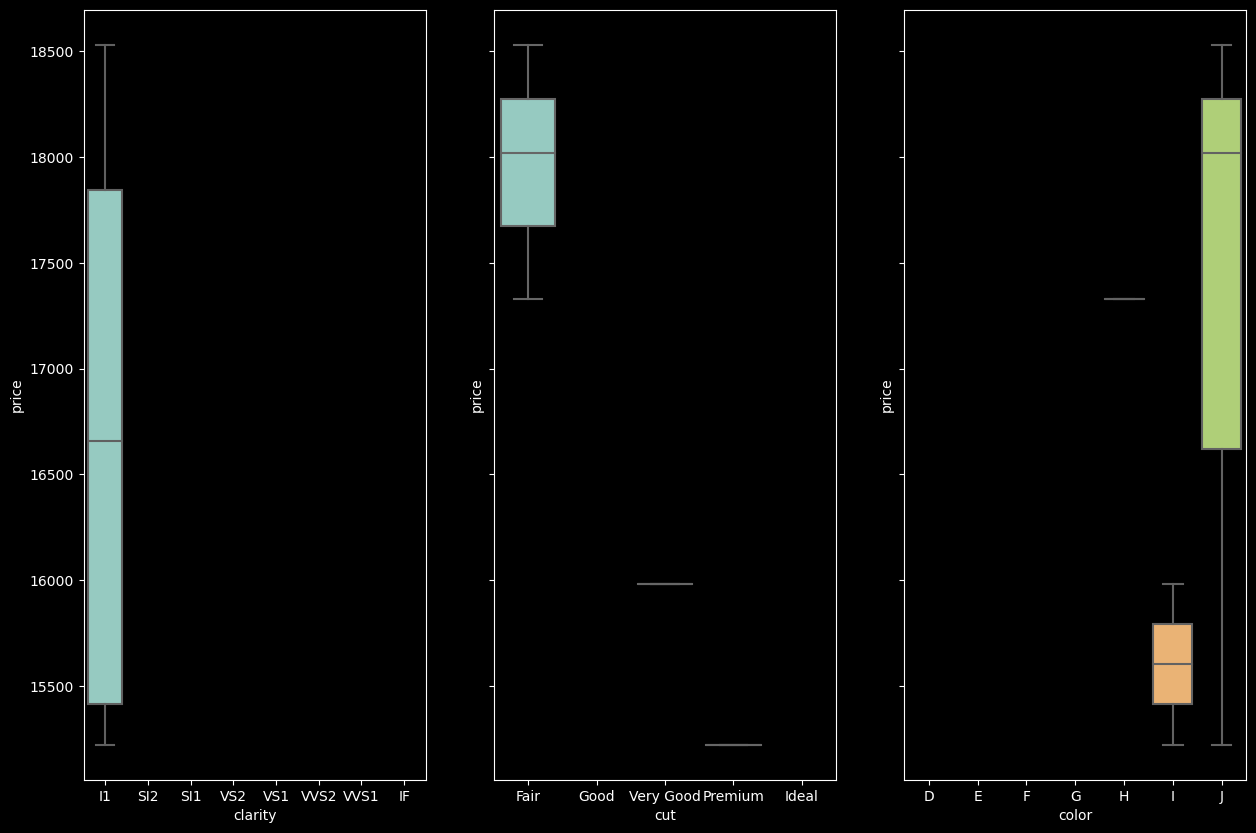

In [132]:
carat_label_list=["XS","S","M","L","XL"]

for carat_label in  carat_label_list:
    fig,axs=plt.subplots(1,3,sharey=True,figsize=(15,10))
    sns.boxplot(data=dimonds[(dimonds["carat_label"])==carat_label],y="price",x="clarity",order=clarity_order, ax=axs[0])
    sns.boxplot(data=dimonds[(dimonds["carat_label"])==carat_label],y="price",x="cut",order=cut_order,ax=axs[1])
    sns.boxplot(data=dimonds[(dimonds["carat_label"])==carat_label],y="price",x="color",order=color_order,ax=axs[2])
    ax.set_title(carat_label)


    plt.show()

In [ ]:
print("median   - ",stats.median(dimonds[(dimonds["carat_label"])=="XS"]

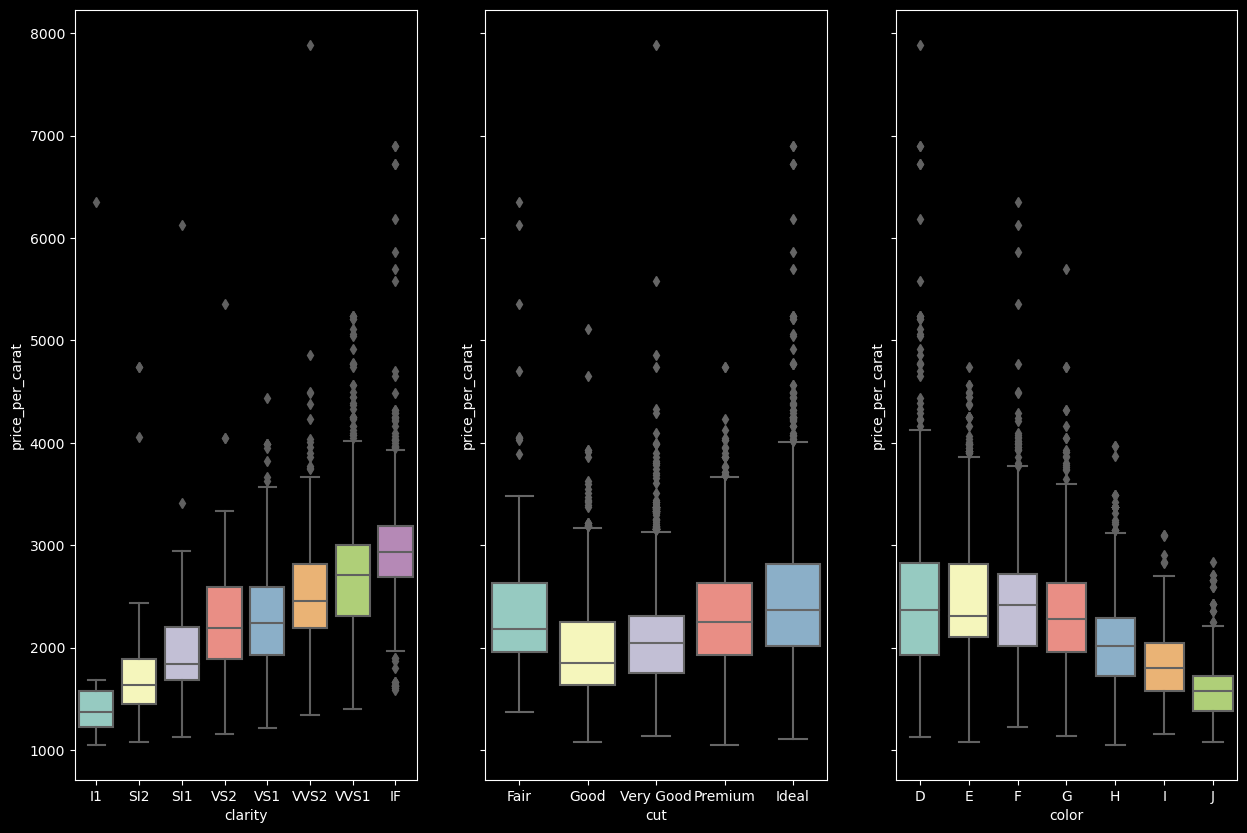

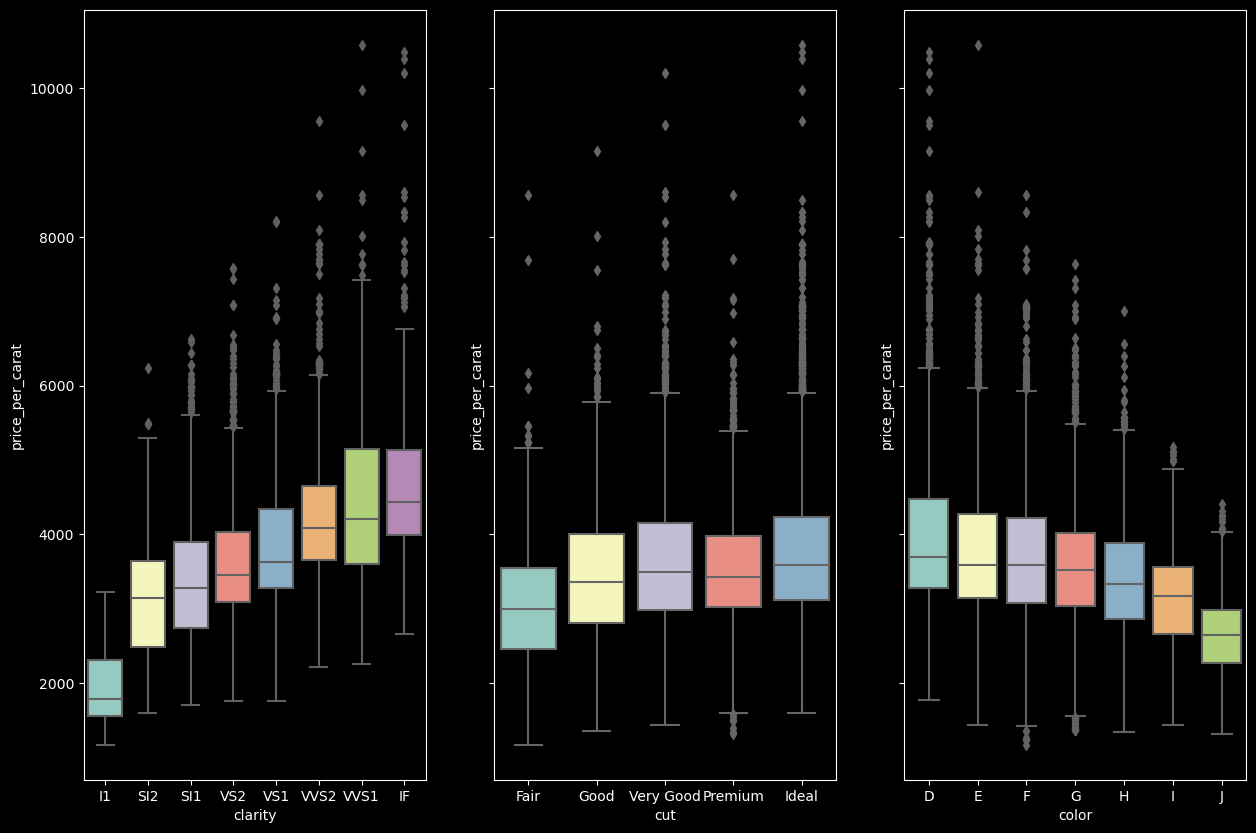

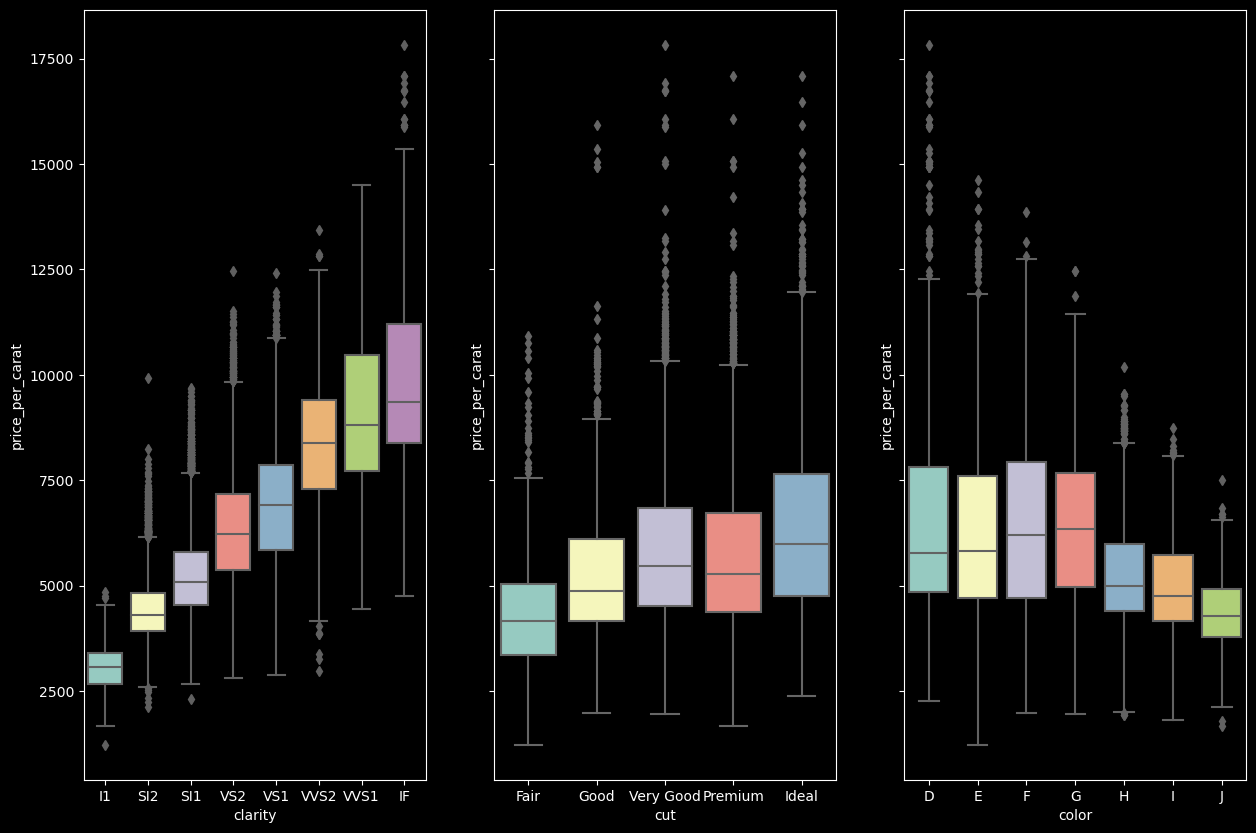

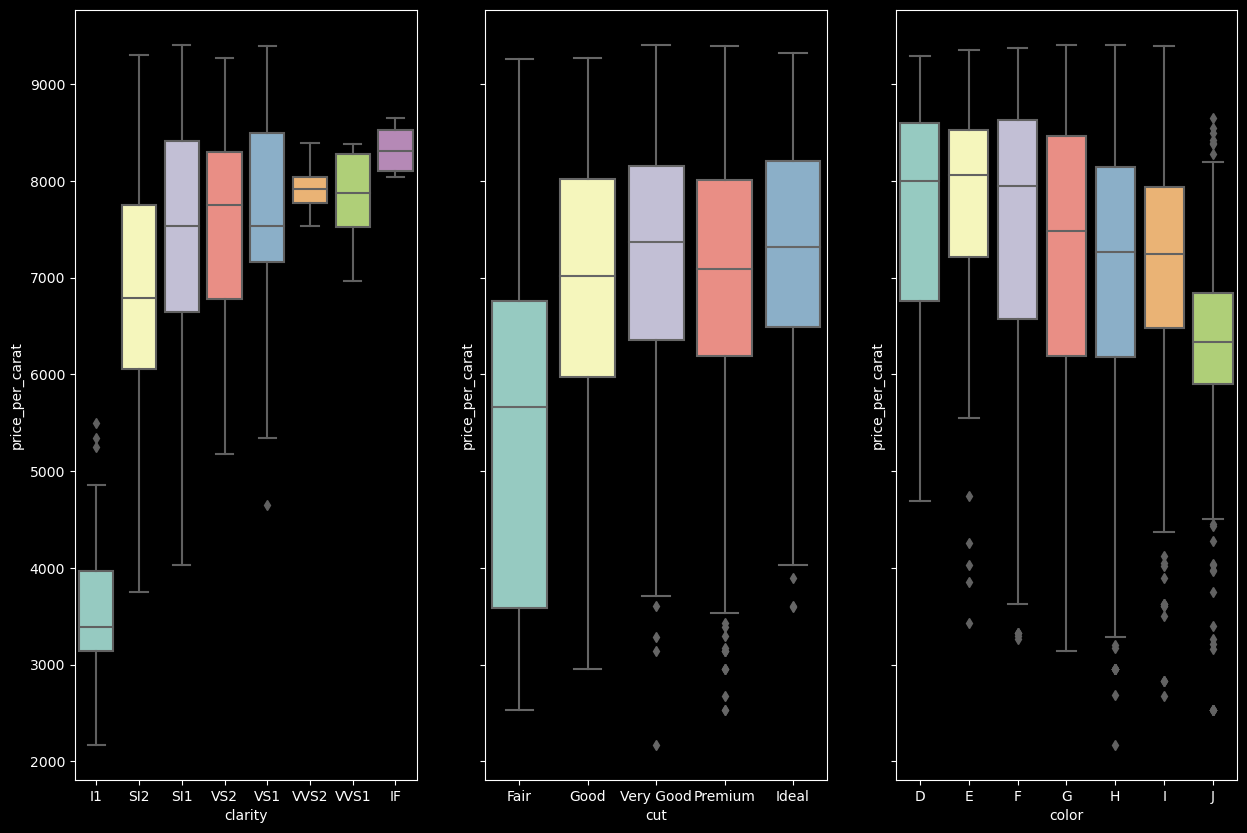

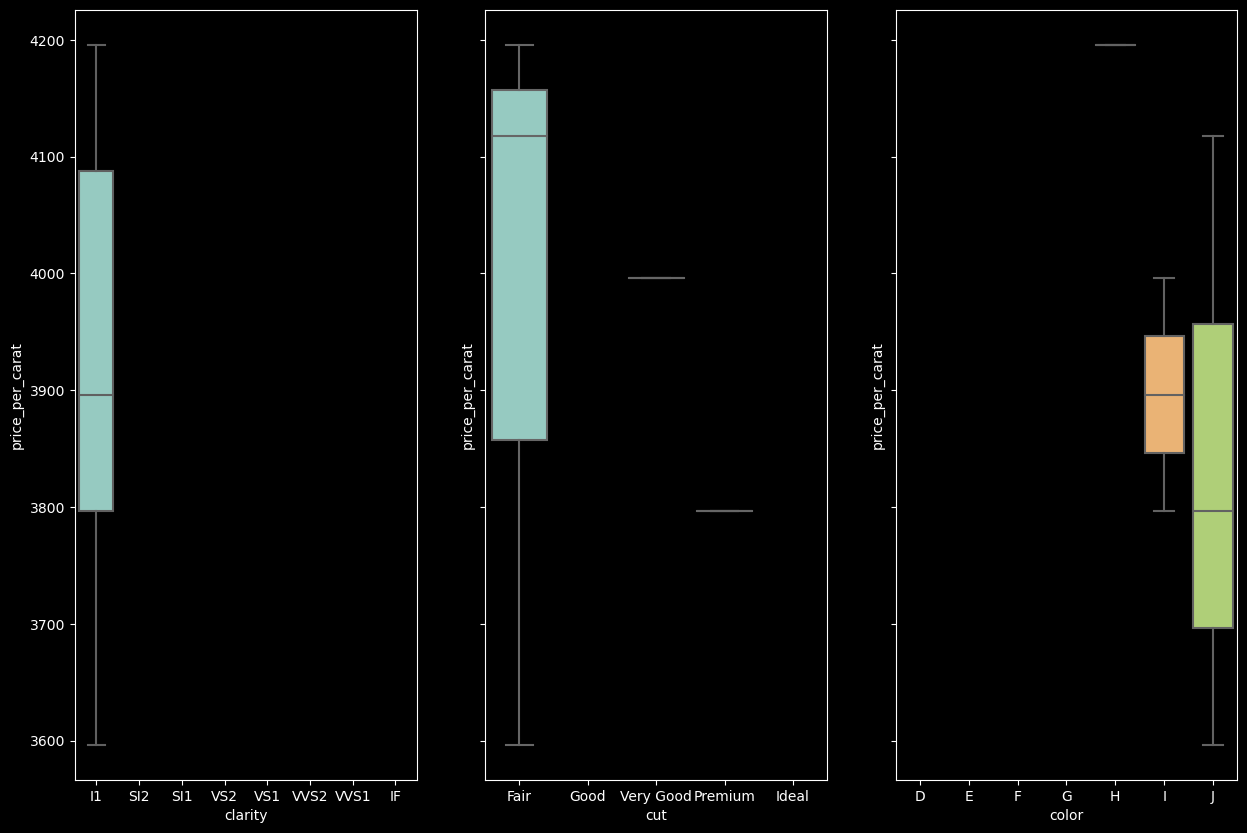

In [133]:
for carat_label in  carat_label_list:
    fig,axs=plt.subplots(1,3,sharey=True,figsize=(15,10))
    sns.boxplot(data=dimonds[(dimonds["carat_label"])==carat_label],y="price_per_carat",x="clarity",order=clarity_order, ax=axs[0])
    sns.boxplot(data=dimonds[(dimonds["carat_label"])==carat_label],y="price_per_carat",x="cut",order=cut_order,ax=axs[1])
    sns.boxplot(data=dimonds[(dimonds["carat_label"])==carat_label],y="price_per_carat",x="color",order=color_order,ax=axs[2])
    
   
    
    ax.set_title(carat_label)


    plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

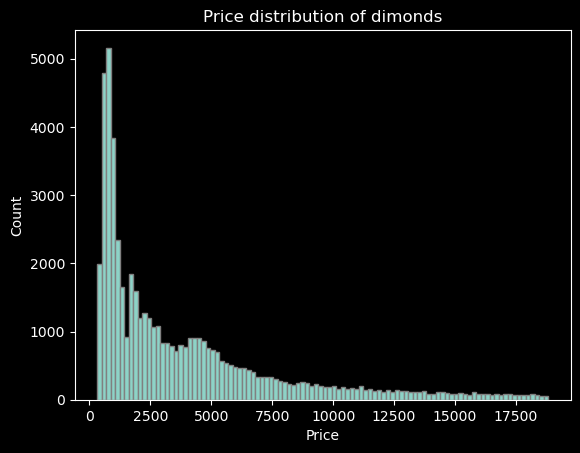

In [124]:
# Price distribution
x=dimonds["price"]
num_bins=100

plt.title("Price distribution of dimonds")
plt.xlabel("Price")
plt.ylabel("Count")
plt.style.use("dark_background")
plt.hist(x, num_bins,edgecolor="grey")
plt.show

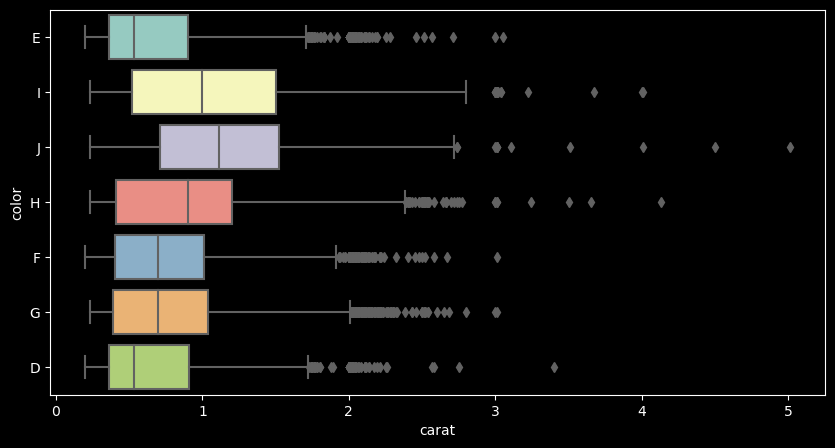

In [125]:
fig,ax=plt.subplots(figsize=(10,5))
plt.title("")
sns.boxplot(data=dimonds, x="carat", y="color",orient="h")
plt.show()